In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 3072 

Nfft = 128
noverlap = 64

F = np.fft.fft(np.eye(Nfft))
# print(F)

h = 0.5 * (1 - np.cos(2 * np.pi *  np.arange(Nfft) / (Nfft - 1)))


overlap_size = 2 * N - Nfft
O = np.zeros((overlap_size, N))
for i in range(overlap_size):
    O[i,noverlap *(i//Nfft) + i % Nfft] = 1
 
A = np.kron(np.eye(N // noverlap - 1), F.dot(np.diag(h)))

A = A @ O

# Plot the real component of S
# plt.imshow(np.real(A), cmap='viridis', aspect='auto')
# # # plt.title('Real Component of Spectrogram Matrix S')
# # # plt.xlabel('Time')
# # # plt.ylabel('Frequency')
# plt.colorbar(label='Amplitude')
# plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6016 is different from 12160)

In [14]:
# plt.imshow(np.abs(A), cmap='viridis')
# # # plt.title('Real Component of Spectrogram Matrix S')
# # # plt.xlabel('Time')
# # # plt.ylabel('Frequency')
# plt.colorbar(label='Amplitude')
# plt.show()

In [15]:
from scipy.io import wavfile
import numpy as np
from scipy.signal import resample

# Specify the path to your .wav file
wav_file_path = 'hello.wav'

# Load the .wav file as a NumPy array
sample_rate, audio_data = wavfile.read(wav_file_path)

desired_sample_rate = 4000

# Calculate the resampling factor
resampling_factor = sample_rate / desired_sample_rate

# Use scipy.signal.resample to downsample the audio data

downsampled_audio_data = resample(audio_data, int(len(audio_data) / resampling_factor))

# Save the downsampled audio as a new .wav file
output_wav_file_path = 'downsampled_audio.wav'  # Change this to your desired output file name
wavfile.write(output_wav_file_path, desired_sample_rate, downsampled_audio_data.astype(np.int16))

# downsampled_audio_data = audio_data[:,0]

In [16]:
data = downsampled_audio_data[:downsampled_audio_data.shape[0] -downsampled_audio_data.shape[0] % Nfft, 1]
print(data.shape)
# print(sample_rate)

(3072,)


In [24]:
spec = A @ data.reshape(-1,1)

print(spec.shape)

(6016, 1)


In [25]:
from IPython.display import Audio

Audio(data, rate=4000)


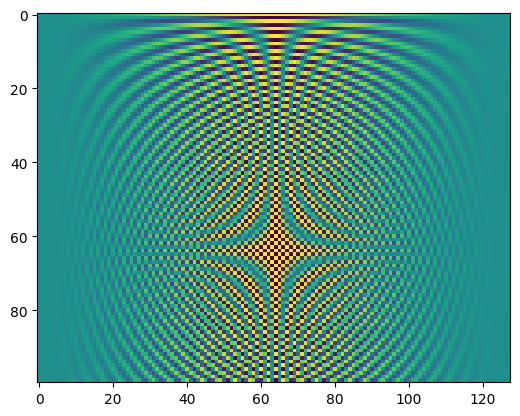

In [26]:
plt.imshow(np.real(A[:100,:128]))

In [20]:
print(spec)
spec.shape

[[-1.41253868e-01+0.00000000e+00j]
 [ 2.60249505e-02+8.17068283e-01j]
 [ 1.75034171e+00-1.67225647e+00j]
 ...
 [ 2.88222889e+03+6.94855036e+03j]
 [-6.20914157e+02-1.80608978e+03j]
 [ 6.99701174e+01-2.22636774e+02j]]


(6016, 1)

In [27]:
spec = spec.reshape(((Nfft),-1), order='F') # vec transpose!!!
print(spec)

[[-1.41253868e-01+0.00000000e+00j -5.21562134e-01+0.00000000e+00j
   1.99326127e+00+0.00000000e+00j ...  1.34544925e+02+0.00000000e+00j
  -3.38729629e+02+0.00000000e+00j -3.43682530e+02+0.00000000e+00j]
 [ 2.60249505e-02+8.17068283e-01j -1.47120696e-01+7.60803976e-01j
  -3.05886083e+00-1.02104643e+00j ...  1.41866775e+02-1.57196344e+02j
  -1.26760595e+02-1.50090527e+02j  6.99701174e+01+2.22636774e+02j]
 [ 1.75034171e+00-1.67225647e+00j  3.01066104e+00-3.46492691e+00j
  -9.25145383e-01+2.69282376e+00j ...  1.38430943e+03-1.08547376e+03j
  -1.55268928e+03-1.26701385e+03j -6.20914157e+02+1.80608978e+03j]
 ...
 [-8.55011465e+00+3.78625443e-01j -6.62685471e+00-9.56741606e+00j
   5.43086079e+00+5.97449677e+00j ... -6.10459803e+03-5.08706449e+03j
   5.92921062e+03-5.26574541e+03j  2.88222889e+03+6.94855036e+03j]
 [ 1.75034171e+00+1.67225647e+00j  3.01066104e+00+3.46492691e+00j
  -9.25145383e-01-2.69282376e+00j ...  1.38430943e+03+1.08547376e+03j
  -1.55268928e+03+1.26701385e+03j -6.20914157e+

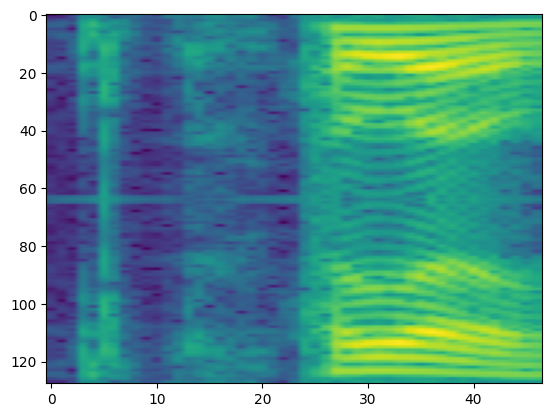

In [28]:
plt.imshow(10*np.log(np.abs(spec)), aspect='auto')

(3072,)


(array([[2.09476694e-04, 2.85592714e-03, 4.17122360e-02, ...,
         1.90050781e+02, 1.20459593e+03, 1.24008065e+03],
        [1.40320814e-02, 1.26082349e-02, 2.18355179e-01, ...,
         9.41456642e+02, 8.10402409e+02, 1.14357901e+03],
        [1.23047513e-01, 4.42410465e-01, 1.70229790e-01, ...,
         6.49777611e+04, 8.43289888e+04, 7.65878149e+04],
        ...,
        [4.04745329e-02, 9.02515155e-03, 6.88555289e-03, ...,
         5.99198981e+01, 6.30525010e-01, 2.37388777e-01],
        [2.96612647e+00, 3.98657820e+00, 6.14550855e+00, ...,
         9.32288859e+01, 4.72071215e+01, 1.10241863e+01],
        [2.37485505e+00, 7.68977936e+00, 1.16949837e+01, ...,
         7.94064717e+01, 6.73199373e+01, 3.05545599e+01]]),
 array([0.      , 0.015625, 0.03125 , 0.046875, 0.0625  , 0.078125,
        0.09375 , 0.109375, 0.125   , 0.140625, 0.15625 , 0.171875,
        0.1875  , 0.203125, 0.21875 , 0.234375, 0.25    , 0.265625,
        0.28125 , 0.296875, 0.3125  , 0.328125, 0.34375 , 0.3

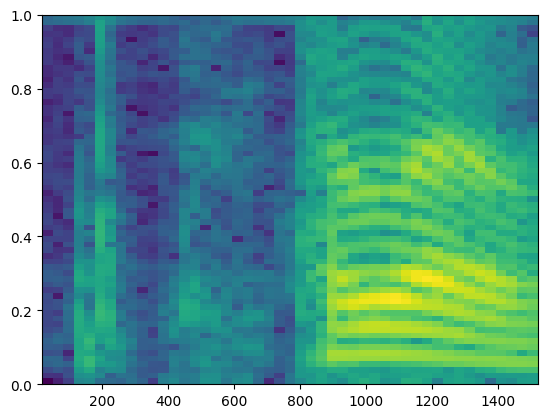

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from scipy.io import wavfile

# Plot the spectrogram
print(data.shape)
plt.specgram(data,noverlap= noverlap, NFFT=Nfft)
